# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from flatten_json import flatten

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
def get_weather(city, api_key):
    url = "https://api.openweathermap.org/data/2.5/weather"
    params = {
        "q" : city,
        "appid" : api_key
    }
    r = requests.get(url, params)
    if r.status_code == 200:
        result = r.json()
        return result
    else:
        print ("City not found")
        return None

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_weather = {}

In [5]:
count = 1
for city in cities:
    search = get_weather(city, api_key)
    if search:
        city_weather[city] = flatten(search)
        print("Processing Item {} / {}".format(count, city))
    count += 1

Processing Item 1 / chokurdakh
Processing Item 2 / nanortalik
Processing Item 3 / hasaki
City not found
Processing Item 5 / ushuaia
Processing Item 6 / tolyatti
Processing Item 7 / tura
Processing Item 8 / oranjestad
Processing Item 9 / boyuibe
Processing Item 10 / abha
Processing Item 11 / rawson
Processing Item 12 / boca do acre
Processing Item 13 / caravelas
Processing Item 14 / iqaluit
Processing Item 15 / rincon
Processing Item 16 / khatanga
Processing Item 17 / severo-kurilsk
Processing Item 18 / general roca
Processing Item 19 / qaanaaq
Processing Item 20 / hobyo
Processing Item 21 / yellowknife
Processing Item 22 / albany
City not found
Processing Item 24 / puerto ayora
Processing Item 25 / tolstoy-yurt
Processing Item 26 / new norfolk
Processing Item 27 / thompson
Processing Item 28 / clyde river
Processing Item 29 / havoysund
Processing Item 30 / hilo
Processing Item 31 / vanimo
Processing Item 32 / urengoy
Processing Item 33 / saldanha
Processing Item 34 / pangkalanbuun
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather

{'chokurdakh': {'coord_lon': 147.9,
  'coord_lat': 70.62,
  'weather_0_id': 801,
  'weather_0_main': 'Clouds',
  'weather_0_description': 'few clouds',
  'weather_0_icon': '02n',
  'base': 'model',
  'main_temp': 240.39,
  'main_feels_like': 234.79,
  'main_temp_min': 240.39,
  'main_temp_max': 240.39,
  'main_pressure': 1012,
  'main_humidity': 95,
  'main_sea_level': 1012,
  'main_grnd_level': 1010,
  'wind_speed': 2.46,
  'wind_deg': 206,
  'clouds_all': 23,
  'dt': 1578455758,
  'sys_country': 'RU',
  'sys_sunrise': 0,
  'sys_sunset': 0,
  'timezone': 39600,
  'id': 2126123,
  'name': 'Chokurdakh',
  'cod': 200},
 'nanortalik': {'coord_lon': -45.24,
  'coord_lat': 60.14,
  'weather_0_id': 601,
  'weather_0_main': 'Snow',
  'weather_0_description': 'snow',
  'weather_0_icon': '13n',
  'base': 'model',
  'main_temp': 272.09,
  'main_feels_like': 258.17,
  'main_temp_min': 272.09,
  'main_temp_max': 272.09,
  'main_pressure': 990,
  'main_humidity': 69,
  'main_sea_level': 990,
  'mai

In [7]:
df = pd.DataFrame(city_weather)
int_df= df.T
int_df.to_csv(output_data_file)

In [8]:
int_df["Max Temp (F)"] = (((int_df["main_temp_max"] - 273.15)*(9/5)) + 32)
clean_df = int_df[["name", "sys_country", "coord_lon", "coord_lat", "clouds_all", "main_humidity", "Max Temp (F)", "wind_speed"]]
clean_df = clean_df.rename(columns = {
    "name" : "City",
    "sys_country" : "Country",
    "coord_lon" : "Longitude",
    "coord_lat" : "Latitude",
    "clouds_all" : "Cloudiness",
    "main_humidity" : "Humidity",
    #"main_temp_max" : "Max Temperature (K)", 
    "wind_speed" : "Wind Speed"
})

In [9]:
clean_df.head()
clean_df.reset_index(drop=True)

,City,Country,Longitude,Latitude,Cloudiness,Humidity,Max Temp (F),Wind Speed
0,Chokurdakh,RU,147.9,70.62,23,95,-26.968,2.46
1,Nanortalik,GL,-45.24,60.14,100,69,30.092,16.01
2,Hasaki,JP,140.83,35.73,75,100,42.8,5.7
3,Ushuaia,AR,-68.31,-54.81,90,93,46.4,3.6
4,Tolyatti,RU,49.41,53.52,90,92,19.4,1.76
...,...,...,...,...,...,...,...,...
543,Piney Green,US,-78.48,35.09,1,72,41,2.89
544,Lavaltrie,CA,-73.28,45.88,90,73,28.004,1.5
545,Lugo,ES,-7.56,43.01,37,86,51.008,2.24
546,Mahina,ML,-10.85,13.76,37,18,62.996,3.19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

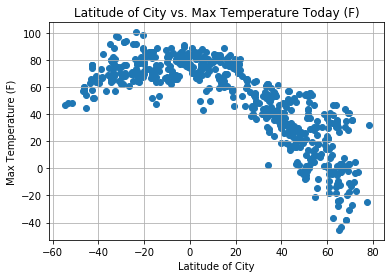

In [10]:
plt.title("Latitude of City vs. Max Temperature Today (F)")
plt.xlabel("Latitude of City")
plt.ylabel("Max Temperature (F)")
plt.xticks()
plt.yticks()
plt.grid()
plt.scatter(clean_df["Latitude"], clean_df["Max Temp (F)"])
plt.savefig("Latitude vs. Temperature", format = "jpeg")

#### Latitude vs. Wind Speed Plot

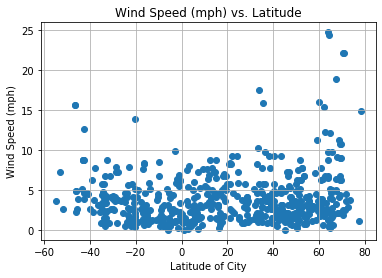

In [11]:
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude of City")
plt.ylabel("Wind Speed (mph)")
plt.xticks()
plt.yticks()
plt.grid()
plt.scatter(clean_df["Latitude"], clean_df["Wind Speed"])
plt.savefig("Latitude vs. Wind Speed", format = "jpeg")

#### Latitude vs. Humidity Plot

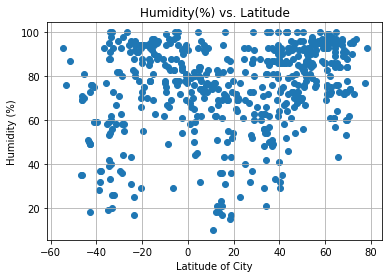

In [12]:
plt.title("Humidity(%) vs. Latitude")
plt.xlabel("Latitude of City")
plt.ylabel("Humidity (%)")
plt.xticks()
plt.yticks()
plt.grid()
plt.scatter(clean_df["Latitude"], clean_df["Humidity"])
plt.savefig("Latitude vs. Humidity", format = "jpeg")

#### Latitude vs. Cloudiness Plot

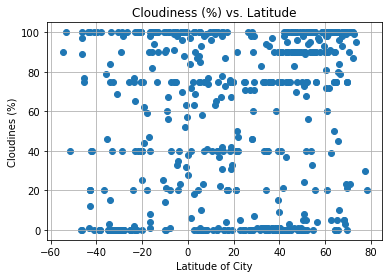

In [13]:
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude of City")
plt.ylabel("Cloudines (%)")
plt.xticks()
plt.yticks()
plt.grid()
plt.scatter(clean_df["Latitude"], clean_df["Cloudiness"])
plt.savefig("Latitude vs. Cloudiness", format = "jpeg")

## Observations

1) There doesn't appear to be any relationship between Cloudiness and the Latitude of the cities. 

2) The relationship between Temperature and Latitude appear to take on a parabolic shape with the point of inflection being around 0 degrees latitude.

3) There is also no apparent relationship between Wind Speed and Latitude, however, it appears the wind speed across all latitudes rarely every goes over 10 MPH